### Grupowanie danych 

### Plik 2 - Agregacja danych i operacje na grupach

In [1]:
# Próba rozwiązania zadania z pliku 'wizualizacja cz.II', czyli:
#zadanie - w różnych miejscach jednego wykresu narusuj: 
#okrąg, wypełniony dowolnym kolorem kwadrat,
#funkcję sinus w przedziale [-pi, pi],
#wykres rozproszenia (np.random.normal(5,1,10)) oraz dowolny tekst
#ładowanie pakietów i modułów
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import turtle as tu
import math
# okrąg wypełniony dowolnym kolorem
#plt.figure()
#t = np.linspace(0, 2*np.pi, 100, endpoint=False)
#plt.fill(np.cos(t), np.sin(t), facecolor=(1, 0, 0, 0.1), edgecolor="darkred") 
# wypełniony dowodlnym kolorem kwadrat
#from bokeh.io import output_notebook, reset_output
#reset_output()
#output_notebook()
#tu.forward(300)
#tu.left(90)
#tu.forward(300)
#tu.left(90)
#tu.forward(300)
#tu.left(90)
#tu.forward(300)
#tu.left(90)
#tu.mainloop()
# II sp. na kwadrat
#from turtle import *
#for x in range(1, 5):
#    fd(100)
#    rt(90)
#plt.fill(color="orange", alpha=1) # przezroczystość koloru r
# sinus od -pi do pi
#x = np.linspace(-1*np.pi,np.pi, 100)
#plt.plot(x,np.sin(x))
# Wykres rozproszenia
#np.random.normal(5,1,10)
# Dowolny tekst
#plt.text(-15, -15, r"Ala ma $\frac{1}{2}$ kota")
#plt.show()

In [1]:
#Wczytujemy biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#wczytamy zbiór tips.csv
#tips = pd.read_csv("dane_tips.csv")
#tips

In [3]:
T = np.random.randn(1, 1)
T

array([[0.51464111]])

In [3]:
#stworzymy teraz nową ramkę danych
osoby = pd.DataFrame(np.random.randn(5, 5), # losujemy wartosc losowe od -5 do 5 by wygenerowac jakies dane
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Jan', 'Ala', 'Robert', 'Kornelia', 'Patryk'])
osoby.iloc[2:3, [1, 2]] = np.nan # Dodaj kilka wartości typu NA. 
# czyli: wiersz 2, czyli 3.(bo numerujemy od 0 i prawostronnie otwarty)  i K: 2,3
osoby

a         b         c         d         e
Jan      -1.674566  1.847462  0.470537  0.710599  1.598572
Ala      -0.197446 -0.301513 -0.390459  2.371204  0.023736
Robert   -0.261367       NaN       NaN  0.687559 -0.490986
Kornelia -0.299980  0.015827  0.733066  0.109284 -0.439728
Patryk    0.036148  0.759831  0.542748  0.781728  0.341939

In [4]:
#następnie robimy mapowanie określające grupy, budujemy słownik
mapowanie = {'a': 'czerwony', 'b': 'czerwony', 'c': 'niebieski',
           'd': 'niebieski', 'e': 'czerwony', 'f' : 'pomarańczowy'}
mapowanie

{'a': 'czerwony',
 'b': 'czerwony',
 'c': 'niebieski',
 'd': 'niebieski',
 'e': 'czerwony',
 'f': 'pomarańczowy'}

In [5]:
#do funkcji groupby można przekazać słownik, nieużywane klucze są OK, patrz 'f'
#Uwaga na zmianę osi grupowania
by_column = osoby.groupby(mapowanie, axis=1) 
# robimy grupowanie względem słownika mapowanie, ale grupujemy OSOBY względem słownika, axis=1 oznacza że bierzemy kolumny
#by_column.sum()

In [6]:
by_column

In [7]:
by_column.groups

{'czerwony': Index(['a', 'b', 'e'], dtype='object'),
 'niebieski': Index(['c', 'd'], dtype='object')}

In [8]:
by_column.sum()

czerwony  niebieski
Jan       1.771468   1.181136
Ala      -0.475224   1.980745
Robert   -0.752353   0.687559
Kornelia -0.723881   0.842350
Patryk    1.137919   1.324475

In [9]:
#do groupby można przekazać także obiekt typu Series
map_series = pd.Series(mapowanie)
map_series
#osoby.groupby(map_series, axis=1).count()

a        czerwony
b        czerwony
c       niebieski
d       niebieski
e        czerwony
f    pomarańczowy
dtype: object

In [10]:
osoby.groupby(map_series, axis=1).count()

czerwony  niebieski
Jan              3          2
Ala              3          2
Robert           2          1
Kornelia         3          2
Patryk           3          2

In [11]:
len(mapowanie) # da ilość el. słownika

6

In [12]:
len("Jan")

3

In [13]:
#grupowanie możemy również wykonać przy użyciu funkcji
#wówczas funkcja jako argument groupby jest wykonywana na indeksie, a wynik tworzy grupę
osoby.groupby(len).sum() # mamy 2 imiona po 3 litery, 2 po 6 i 1 po 8, czyli dostajemy 3 wiersze, a 2 są tworzone jako suma 2 pojedynczych

a         b         c         d         e
3 -1.872012  1.545949  0.080077  3.081803  1.622307
6 -0.225218  0.759831  0.542748  1.469287 -0.149047
8 -0.299980  0.015827  0.733066  0.109284 -0.439728

In [14]:
#mieszanie funkcji ze słownikami, tablicami lub seriami również nie stanowi problemu
key_list = ['jeden', 'jeden', 'jeden', 'dwa', 'dwa']
osoby.groupby([len, key_list]).min()
# Wyjaśnienie:
# Robert i Patryk mają te same wartości (6 - długość), ale zgodnie z key_list Robert ma 'jeden', Patryk ma 'dwa',
# Jan i Ala ma po 3 litery ale obie wartość 'jeden'
# Jak widać, mamy 2 indeksy: I - dł. imienia, II - wartości z key_list, stworzyliśmy multiindeks
# Dla 8. są te same wartości co dla tabeli wyżej, dla 6. rozbiecie na wartości Roberta i PAtryka, dla 3 jest tak:
# bierzesz minimum z Jan/Ala

a         b         c         d         e
3 jeden -1.674566 -0.301513 -0.390459  0.710599  0.023736
6 dwa    0.036148  0.759831  0.542748  0.781728  0.341939
  jeden -0.261367       NaN       NaN  0.687559 -0.490986
8 dwa   -0.299980  0.015827  0.733066  0.109284 -0.439728

In [15]:
#ważnym zagadnieniem jest agregowanie zbiorów indeksowanych hierarchicznie
#przed grupowaniem należy określić nazwę lub numer poziomu
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['miasto', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df # tworzymy multiindeks dla kolumn, czyli podwójne indeksowanie kolumn

miasto        US                            JP          
tenor          1         3         5         1         3
0      -0.594195  1.397582 -1.537682  1.646556 -0.271107
1      -0.256776  0.886647  0.812380  0.554898 -0.948412
2       1.205094  0.314772 -0.151581 -1.428765  0.902000
3      -0.915711 -0.455257 -0.065524  0.052065 -0.666473

In [16]:
hier_df.miasto
# widzimy,że nie mamy atrybutu miasto, bo t onazwa indeksu, nie możemy operować na tych indeksach, a na ich konkretnych wartościach

AttributeError: 'DataFrame' object has no attribute 'miasto'

In [17]:
hier_df.US # to jest właśnie indeks hierarchiczny

tenor         1         3         5
0     -0.594195  1.397582 -1.537682
1     -0.256776  0.886647  0.812380
2      1.205094  0.314772 -0.151581
3     -0.915711 -0.455257 -0.065524

In [18]:
# to by się nie udało: hier_df["1"], potrzebny jest iloc:
hier_df.iloc[:,2:]

miasto        US        JP          
tenor          5         1         3
0      -1.537682  1.646556 -0.271107
1       0.812380  0.554898 -0.948412
2      -0.151581 -1.428765  0.902000
3      -0.065524  0.052065 -0.666473

In [19]:
hier_df.groupby(level='miasto', axis=1).count() # indeks hierarchiczny, więc grupujemy albo po indeksie, albo po tenorze

miasto  JP  US
0        2   3
1        2   3
2        2   3
3        2   3

In [20]:
hier_df.groupby(level='tenor', axis=1).count()

tenor  1  3  5
0      2  2  1
1      2  2  1
2      2  2  1
3      2  2  1

In [21]:
# Odnośnie tego co wychodziło z błedami, możemy się dostać do kolumn poprzez indeks hierarchiczny
hier_df
#hier_df.JP.b # np.
hier_df.JP.b # byłoby OK, jeśli wartości dla tenor zmienisz na łańcuchy znaków

AttributeError: 'DataFrame' object has no attribute 'b'

In [22]:
hier_df.JP["1"] # wtedy i to by zadziałało

KeyError: '1'

In [23]:
 test_df = pd.DataFrame({'klucz1' : ['a', 'a', 'b', 'b', 'a'],
                        'klucz2' : ['jeden', 'dwa', 'jeden', 'dwa', 'jeden'],
                        'dane1' : np.random.randn(5),
                        'dane2' : np.random.randn(5)})
test_df

klucz1 klucz2     dane1     dane2
0      a  jeden -0.642414 -0.477922
1      a    dwa  0.083010  0.381878
2      b  jeden  0.490851 -0.438913
3      b    dwa  0.724778 -1.221338
4      a  jeden  0.031756  0.576975

In [24]:
#większość funkcji możliwych do wykonania na kolumnach ramek danych lub obiektach typu Series można zastosować również do obiektów GroupBy
grouped = test_df.groupby('klucz1')
grouped['dane1'].quantile(0.9) # wyznaczamy 9. kwantyl, czyli spr. jaka jest wartość, dla której pozostałych 90% jest mniejszych i 10% jest większych

klucz1
a    0.072760
b    0.701385
Name: dane1, dtype: float64

In [25]:
grouped = test_df.groupby('klucz1')
aaa = grouped['dane1']
aaa.unique()

klucz1
a    [-0.6424144354526541, 0.0830103770000176, 0.03...
b            [0.49085089349700817, 0.7247781960692874]
Name: dane1, dtype: object

In [26]:
#oczywiście własne funkcje są również akceptowane
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

dane1     dane2
klucz1                    
a       0.725425  1.054897
b       0.233927  0.782425

In [27]:
#jeszcze inny przykład
grouped.describe()

dane1                                                              \
       count      mean       std       min       25%       50%       75%   
klucz1                                                                     
a        3.0 -0.175883  0.404840 -0.642414 -0.305329  0.031756  0.057383   
b        2.0  0.607815  0.165412  0.490851  0.549333  0.607815  0.666296   

                 dane2                                                    \
             max count      mean       std       min       25%       50%   
klucz1                                                                     
a       0.083010   3.0  0.160310  0.561267 -0.477922 -0.048022  0.381878   
b       0.724778   2.0 -0.830126  0.553258 -1.221338 -1.025732 -0.830126   

                            
             75%       max  
klucz1                      
a       0.479426  0.576975  
b      -0.634519 -0.438913

In [28]:
aaa = grouped.describe()

In [29]:
aaa.dane1.mean

<bound method DataFrame.mean of         count      mean       std       min       25%       50%       75%  \
klucz1                                                                      
a         3.0 -0.175883  0.404840 -0.642414 -0.305329  0.031756  0.057383   
b         2.0  0.607815  0.165412  0.490851  0.549333  0.607815  0.666296   

             max  
klucz1            
a       0.083010  
b       0.724778  >

In [30]:
aaa.dane1["min"]

klucz1
a   -0.642414
b    0.490851
Name: min, dtype: float64

In [3]:
# wczytamy zbiór tips.csv
tips = pd.read_csv("dane_tips.csv")
tips

total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]

In [32]:
#tworzymy kolumnę z wartością procentową, jaką stanowi napiwek w stosunku do całego rachunku
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
5       25.29  4.71     No  Sun  Dinner     4  0.186240

In [5]:
#grupowanie dokonamy na poziomie dnia tygodnia i informacji czy osoba była paliła papierosy
grouped = tips.groupby(['day', 'smoker'])
grouped

In [34]:
# w ten spsób możemy z grupy sobie wyciągnąć nazwy kolumn
grouped.obj.columns

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

In [35]:
#interesuje nas średnia nowej zmiennej 
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [36]:
#w ten sposób możemy budować ramki danych zawierające stworzone przez nas cechy, ponieważ do funkcji agregującej możemy przekazać listę funkcji
grouped_pct.agg(['mean', 'std', peak_to_peak]) # peak_to_peak to rozstęp między min a max

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [37]:
# unstack() powoduje, że mamy ramkę multiindeksu
grouped_pct.agg(['mean', 'std', peak_to_peak]).unstack()

mean                 std           peak_to_peak          
smoker        No       Yes        No       Yes           No       Yes
day                                                                  
Fri     0.151650  0.174783  0.028123  0.051293     0.067349  0.159925
Sat     0.158048  0.147906  0.039767  0.061375     0.235193  0.290095
Sun     0.160113  0.187250  0.042347  0.154134     0.193226  0.644685
Thur    0.160298  0.163863  0.038774  0.039389     0.193350  0.151240

In [38]:
aaa = grouped_pct.agg(['mean', 'std', peak_to_peak]).unstack()

In [39]:
aaa["mean"] # anal. std itp.

smoker        No       Yes
day                       
Fri     0.151650  0.174783
Sat     0.158048  0.147906
Sun     0.160113  0.187250
Thur    0.160298  0.163863

In [40]:
aaa["mean"]["Yes"] # Wybieramy konkretną kolumne

day
Fri     0.174783
Sat     0.147906
Sun     0.187250
Thur    0.163863
Name: Yes, dtype: float64

In [41]:
aaa["mean"]["Yes"].values

array([0.17478305, 0.14790607, 0.18725032, 0.16386327])

In [42]:
#tak tworzonym kolumnom można nadawać własne nazwy
grouped_pct.agg([('średnia', 'mean'), ('odch_std', np.std)])

średnia  odch_std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [43]:
#tę samą listę funkcji agregujących można zastosować do wybranych zmiennych
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result
#result['tip_pct']

<ipython-input-43-9cf0382e5c7d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [44]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [45]:
#tu również kolumnom można nadać własne nazwy
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-45-1658785bf3ee>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [46]:
#akceptowalne są również słowniki
grouped.agg({'tip' : np.max, 'size' : 'sum'})
#grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
 #            'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [47]:
# dostaliśmy w wyniku: na f-cję aggregate podajemy słownik i w nim podajemy, na jakiej kolumnie mamy zrobić jaką funkcję

In [48]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
           'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [49]:
#przykład jak wyłączyć indeks hierarchiczny, który nie zawsze jest potrzebny
tips.groupby(['day', 'smoker'], as_index=False).mean()

day smoker  total_bill       tip      size   tip_pct
0   Fri     No   18.420000  2.812500  2.250000  0.151650
1   Fri    Yes   16.813333  2.714000  2.066667  0.174783
2   Sat     No   19.661778  3.102889  2.555556  0.158048
3   Sat    Yes   21.276667  2.875476  2.476190  0.147906
4   Sun     No   20.506667  3.167895  2.929825  0.160113
5   Sun    Yes   24.120000  3.516842  2.578947  0.187250
6  Thur     No   17.113111  2.673778  2.488889  0.160298
7  Thur    Yes   19.190588  3.030000  2.352941  0.163863

In [50]:
#chcemy wybrać pięć najwyższych wartości tip_pct z podziałem na grupy
#najpierw tworzymy funkcję wybierającą 5 największych wartości z danej kolumny
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6) # jest posortowane od dołu

total_bill   tip smoker  day    time  size   tip_pct
109       14.31  4.00    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39     No  Sat  Dinner     2  0.291990
67         3.07  1.00    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Yes  Sun  Dinner     2  0.710345

In [51]:
#a następnie korzystamy z funkcji apply
tips.groupby('smoker').apply(top) # stosujemy apply i wywołujemy top na grupie zbudowanej ze smoker
# czyli dostajemy po 5 największych wartości dla każdej wartości z 'smoker', tj. dla yes i no

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [52]:
#jeżeli do funkcji top chcemy przekazać inne niż domyślne argumenty możemy to zrobić 
#wprowadzając kolejne agrgumenty funkcji apply (genialne) !!!
tips.groupby(['smoker', 'day']).apply(top, n=3, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  223       15.98   3.00     No   Fri   Lunch     3  0.187735
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  23        39.42   7.58     No   Sat  Dinner     4  0.192288
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  11        35.26   5.00     No   Sun  Dinner     4  0.141804
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 141       34.30   6.70     No  Thur   Lunch     6  0.195335
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  96        27.28   4.00    Yes   Fri  Dinner     2  0.146628
            90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 192       28.44   2.56    Yes  Thur   Lunch     2  0.090014
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [53]:
#przykład użycia funkcji lambda w połączeniu z apply
#podejście nr 1
result = tips.groupby('smoker')['tip_pct'].describe() # gruupby na zm. smoker po kolumnie tip_pct
#result.T
#result.unstack('smoker')

In [54]:
result

count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345

In [55]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [56]:
result.unstack('smoker')[1]

93.0

In [57]:
result.T

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [58]:
#podejście nr 2
f = lambda x: x.describe()
(tips.groupby('smoker')['tip_pct'].apply(f)).unstack('smoker')

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [59]:
#usunięcie indeksu hierarchicznego
tips.groupby('smoker', group_keys=False).apply(top) 
# tu 'group_keys=False' zwykle jest TRUE, FALSE daje nam to, że dostajemy dataframe bez żadnych indeksów, pierwsze 5 wartości ma No, a kolejne 5 jest Yes

total_bill   tip smoker   day    time  size   tip_pct
88        24.71  5.85     No  Thur   Lunch     2  0.236746
185       20.69  5.00     No   Sun  Dinner     5  0.241663
51        10.29  2.60     No   Sun  Dinner     2  0.252672
149        7.51  2.00     No  Thur   Lunch     2  0.266312
232       11.61  3.39     No   Sat  Dinner     2  0.291990
109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [60]:
# resetujemy indeks
tips.groupby('smoker', group_keys=False).apply(top).reset_index()

index  total_bill   tip smoker   day    time  size   tip_pct
0     88       24.71  5.85     No  Thur   Lunch     2  0.236746
1    185       20.69  5.00     No   Sun  Dinner     5  0.241663
2     51       10.29  2.60     No   Sun  Dinner     2  0.252672
3    149        7.51  2.00     No  Thur   Lunch     2  0.266312
4    232       11.61  3.39     No   Sat  Dinner     2  0.291990
5    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
6    183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
7     67        3.07  1.00    Yes   Sat  Dinner     1  0.325733
8    178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
9    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

### Zadanie 1 

In [61]:
#Zadanie I
#1. Wczytaj dane dotyczące pracy węzła ciepłowniczego (plik dane_z_wezla.csv)
#2. Oblicz średnią różnicę temperatur zasilenia i powrotu w każdym tygodniu
#3. Przedstaw wyniki na wykresie

In [62]:
dane_wezel = pd.read_csv("dane_z_wezla.csv")
dane_wezel 

Modul  Identyfikator  Lokalizacja         Data odczytu  \
0      70041029       13213086  Jakis adres  2015-12-31 23:55:00   
1      70041029       13213086  Jakis adres  2015-12-31 23:40:00   
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
3      70041029       13213086  Jakis adres  2015-12-31 23:10:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
...         ...            ...          ...                  ...   
34517  70041029       13213086  Jakis adres  2015-01-01 01:10:00   
34518  70041029       13213086  Jakis adres  2015-01-01 00:55:00   
34519  70041029       13213086  Jakis adres  2015-01-01 00:40:00   
34520  70041029       13213086  Jakis adres  2015-01-01 00:25:00   
34521  70041029       13213086  Jakis adres  2015-01-01 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
0      2016-01-01 00:13:56        989.64            1273   
1      2015-12-31 23:58:56        989.60            1249   
2      2015-12-31 23:43:56        989.56             958   
3      2015-12-31 23:28:56        989.52            1064   
4      2015-12-31 23:13:56        989.47             996   
...                    ...           ...             ...   
34517  2015-01-01 01:28:56        340.20             643   
34518  2015-01-01 01:13:56        340.17             630   
34519  2015-01-01 00:58:56        340.15             623   
34520  2015-01-01 00:43:56        340.13             642   
34521  2015-01-01 00:28:56        340.10             673   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
0                           95.5                     61.3   
1                           96.8                     64.9   
2                          103.0                     63.5   
3                          100.5                     63.6   
4                          100.2                     60.3   
...                          ...                      ...   
34517                       80.6                     45.1   
34518                       80.7                     44.3   
34519                       80.2                     45.4   
34520                       79.8                     45.4   
34521                       78.9                     45.6   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
0                       34.18        7447.07              17544      50.2   
1                       31.88        7446.75              17544      45.4   
2                       39.50        7446.47              17544      43.0   
3                       36.88        7446.22              17544      44.6   
4                       39.88        7445.96              17544      46.4   
...                       ...            ...                ...       ...   
34517                   35.44        2544.26               8784      26.3   
34518                   36.47        2544.10               8784      26.5   
34519                   34.78        2543.95               8784      24.9   
34520                   34.31        2543.79               8784      26.1   
34521                   33.26        2543.62               8784      25.8   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
0             0             -                         0.1   
1             0             -                         0.1   
2             0             -                         0.1   
3             0             -                         0.1   
4             0             -                         0.1   
...         ...           ...                         ...   
34517         0             -                         0.0   
34518         0             -                         0.0   
34519         0             -                         0.0   
34520         0             -                         0.0   
34521         0             -                         0.0   

       Objetosc wodomierza 2 [m2]  
0                               0  
1        

In [63]:
dane_wezel.info() # nie mamy prawie żadnych braków danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34522 entries, 0 to 34521
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Modul                       34522 non-null  int64  
 1   Identyfikator               34522 non-null  int64  
 2   Lokalizacja                 34522 non-null  object 
 3   Data odczytu                34522 non-null  object 
 4   Data rejestracji            34522 non-null  object 
 5   Energia [GJ]                34522 non-null  float64
 6   Przeplyw [l/h]              34522 non-null  int64  
 7   Temperatura zasilania [C]   34522 non-null  float64
 8   Temperatura powrotu [C]     34522 non-null  float64
 9   Roznica temperatur [C]      34522 non-null  float64
 10  Objetosc [m2]               34522 non-null  float64
 11  Godziny pracy [h]           34522 non-null  int64  
 12  Moc [kW]                    34522 non-null  float64
 13  Kod info                    345

In [64]:
dane_wezel.columns # by pokazać jak nie wolno nazywać kolumn, bez  polskich znaków czy znaków specjlanych !!!

Index(['Modul', 'Identyfikator', 'Lokalizacja', 'Data odczytu',
       'Data rejestracji', 'Energia [GJ]', 'Przeplyw [l/h]',
       'Temperatura zasilania [C]', 'Temperatura powrotu [C]',
       'Roznica temperatur [C]', 'Objetosc [m2]', 'Godziny pracy [h]',
       'Moc [kW]', 'Kod info', 'Numer klienta', 'Objetosc wodomierza 1 [m2]',
       'Objetosc wodomierza 2 [m2]'],
      dtype='object')

In [65]:
from datetime import datetime # żeby dobrze odczytać datę
dane_wezel['data'] =  pd.to_datetime(dane_wezel["Data odczytu"],
                                             format='%Y-%m-%d %H:%M:%S')
dane_wezel

Modul  Identyfikator  Lokalizacja         Data odczytu  \
0      70041029       13213086  Jakis adres  2015-12-31 23:55:00   
1      70041029       13213086  Jakis adres  2015-12-31 23:40:00   
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
3      70041029       13213086  Jakis adres  2015-12-31 23:10:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
...         ...            ...          ...                  ...   
34517  70041029       13213086  Jakis adres  2015-01-01 01:10:00   
34518  70041029       13213086  Jakis adres  2015-01-01 00:55:00   
34519  70041029       13213086  Jakis adres  2015-01-01 00:40:00   
34520  70041029       13213086  Jakis adres  2015-01-01 00:25:00   
34521  70041029       13213086  Jakis adres  2015-01-01 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
0      2016-01-01 00:13:56        989.64            1273   
1      2015-12-31 23:58:56        989.60            1249   
2      2015-12-31 23:43:56        989.56             958   
3      2015-12-31 23:28:56        989.52            1064   
4      2015-12-31 23:13:56        989.47             996   
...                    ...           ...             ...   
34517  2015-01-01 01:28:56        340.20             643   
34518  2015-01-01 01:13:56        340.17             630   
34519  2015-01-01 00:58:56        340.15             623   
34520  2015-01-01 00:43:56        340.13             642   
34521  2015-01-01 00:28:56        340.10             673   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
0                           95.5                     61.3   
1                           96.8                     64.9   
2                          103.0                     63.5   
3                          100.5                     63.6   
4                          100.2                     60.3   
...                          ...                      ...   
34517                       80.6                     45.1   
34518                       80.7                     44.3   
34519                       80.2                     45.4   
34520                       79.8                     45.4   
34521                       78.9                     45.6   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
0                       34.18        7447.07              17544      50.2   
1                       31.88        7446.75              17544      45.4   
2                       39.50        7446.47              17544      43.0   
3                       36.88        7446.22              17544      44.6   
4                       39.88        7445.96              17544      46.4   
...                       ...            ...                ...       ...   
34517                   35.44        2544.26               8784      26.3   
34518                   36.47        2544.10               8784      26.5   
34519                   34.78        2543.95               8784      24.9   
34520                   34.31        2543.79               8784      26.1   
34521                   33.26        2543.62               8784      25.8   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
0             0             -                         0.1   
1             0             -                         0.1   
2             0             -                         0.1   
3             0             -                         0.1   
4             0             -                         0.1   
...         ...           ...                         ...   
34517         0             -                         0.0   
34518         0             -                         0.0   
34519         0             -                         0.0   
34520         0             -                         0.0   
34521         0             -                         0.0   

       Objetosc wodomierza 2 [m2]                data  
0                        

In [66]:
dane_wezel.info() # widzimy zmianę typu zmiennej data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34522 entries, 0 to 34521
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Modul                       34522 non-null  int64         
 1   Identyfikator               34522 non-null  int64         
 2   Lokalizacja                 34522 non-null  object        
 3   Data odczytu                34522 non-null  object        
 4   Data rejestracji            34522 non-null  object        
 5   Energia [GJ]                34522 non-null  float64       
 6   Przeplyw [l/h]              34522 non-null  int64         
 7   Temperatura zasilania [C]   34522 non-null  float64       
 8   Temperatura powrotu [C]     34522 non-null  float64       
 9   Roznica temperatur [C]      34522 non-null  float64       
 10  Objetosc [m2]               34522 non-null  float64       
 11  Godziny pracy [h]           34522 non-null  int64     

In [67]:
def create_week_number(date_in_column):
    return date_in_column.isocalendar()[1]

In [68]:
dane_wezel.data[0].isocalendar() # rok, nr tygodnia, dzień

(2015, 53, 4)

In [69]:
dane_wezel['week'] = dane_wezel.data.apply(create_week_number)

In [70]:
dane_wezel

Modul  Identyfikator  Lokalizacja         Data odczytu  \
0      70041029       13213086  Jakis adres  2015-12-31 23:55:00   
1      70041029       13213086  Jakis adres  2015-12-31 23:40:00   
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
3      70041029       13213086  Jakis adres  2015-12-31 23:10:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
...         ...            ...          ...                  ...   
34517  70041029       13213086  Jakis adres  2015-01-01 01:10:00   
34518  70041029       13213086  Jakis adres  2015-01-01 00:55:00   
34519  70041029       13213086  Jakis adres  2015-01-01 00:40:00   
34520  70041029       13213086  Jakis adres  2015-01-01 00:25:00   
34521  70041029       13213086  Jakis adres  2015-01-01 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
0      2016-01-01 00:13:56        989.64            1273   
1      2015-12-31 23:58:56        989.60            1249   
2      2015-12-31 23:43:56        989.56             958   
3      2015-12-31 23:28:56        989.52            1064   
4      2015-12-31 23:13:56        989.47             996   
...                    ...           ...             ...   
34517  2015-01-01 01:28:56        340.20             643   
34518  2015-01-01 01:13:56        340.17             630   
34519  2015-01-01 00:58:56        340.15             623   
34520  2015-01-01 00:43:56        340.13             642   
34521  2015-01-01 00:28:56        340.10             673   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
0                           95.5                     61.3   
1                           96.8                     64.9   
2                          103.0                     63.5   
3                          100.5                     63.6   
4                          100.2                     60.3   
...                          ...                      ...   
34517                       80.6                     45.1   
34518                       80.7                     44.3   
34519                       80.2                     45.4   
34520                       79.8                     45.4   
34521                       78.9                     45.6   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
0                       34.18        7447.07              17544      50.2   
1                       31.88        7446.75              17544      45.4   
2                       39.50        7446.47              17544      43.0   
3                       36.88        7446.22              17544      44.6   
4                       39.88        7445.96              17544      46.4   
...                       ...            ...                ...       ...   
34517                   35.44        2544.26               8784      26.3   
34518                   36.47        2544.10               8784      26.5   
34519                   34.78        2543.95               8784      24.9   
34520                   34.31        2543.79               8784      26.1   
34521                   33.26        2543.62               8784      25.8   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
0             0             -                         0.1   
1             0             -                         0.1   
2             0             -                         0.1   
3             0             -                         0.1   
4             0             -                         0.1   
...         ...           ...                         ...   
34517         0             -                         0.0   
34518         0             -                         0.0   
34519         0             -                         0.0   
34520         0             -                         0.0   
34521         0             -                         0.0   

       Objetosc wodomierza 2 [m2]                data  week  
0                  

In [71]:
dane_wezel.week.unique()

array([53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37,
       36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1], dtype=int64)

In [72]:
grouped_week = dane_wezel['Roznica temperatur [C]'].groupby(dane_wezel['week']).mean()
grouped_week

week
1         34.067734
2         37.224940
3         34.628155
4         38.060133
5         37.535387
6         39.872470
7         36.964567
8         36.627783
9         34.479435
10        34.613713
11        33.185476
12        32.170774
13        32.710709
14        33.515729
15        32.173690
16        32.004360
17        31.617068
18        30.250244
19        30.343705
20        30.491369
21        29.326548
22        27.721159
23        24.142882
24        26.892961
25        27.043854
26        27.491443
27        25.346910
28        25.388318
29        25.013581
30        25.817277
31        25.238722
32        23.208758
33        24.882827
34        24.218988
35        24.900848
36        24.256429
37        22.324286
38    319592.027039
39    382938.302645
40        28.632426
41        29.909048
42        31.523571
43        32.047560
44        30.072242
45        30.578869
46        30.933512
47        31.042050
48        33.768676
49        31.444836
50        32.12

In [73]:
dane_wezel[dane_wezel.week == 38]

Modul  Identyfikator  Lokalizacja         Data odczytu  \
9674   70041029       13213086  Jakis adres  2015-09-20 23:55:00   
9675   70041029       13213086  Jakis adres  2015-09-20 23:40:00   
9676   70041029       13213086  Jakis adres  2015-09-20 23:25:00   
9677   70041029       13213086  Jakis adres  2015-09-20 23:10:00   
9678   70041029       13213086  Jakis adres  2015-09-20 22:55:00   
...         ...            ...          ...                  ...   
10341  70041029       13213086  Jakis adres  2015-09-14 01:10:00   
10342  70041029       13213086  Jakis adres  2015-09-14 00:55:00   
10343  70041029       13213086  Jakis adres  2015-09-14 00:40:00   
10344  70041029       13213086  Jakis adres  2015-09-14 00:25:00   
10345  70041029       13213086  Jakis adres  2015-09-14 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
9674   2015-09-21 00:13:55        766.51             222   
9675   2015-09-20 23:58:55        766.51             221   
9676   2015-09-20 23:43:55        766.50             227   
9677   2015-09-20 23:28:55        766.49             469   
9678   2015-09-20 23:13:55        766.47             314   
...                    ...           ...             ...   
10341  2015-09-14 01:28:56        761.55             234   
10342  2015-09-14 01:13:56        761.54             229   
10343  2015-09-14 00:58:56        761.54             231   
10344  2015-09-14 00:43:56        761.53             230   
10345  2015-09-14 00:28:56        761.53             232   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
9674                        65.1                     46.5   
9675                        66.1                     45.4   
9676                        67.1                     45.9   
9677                        69.2                     22.5   
9678                        71.1                     23.8   
...                          ...                      ...   
10341                       64.9                     46.5   
10342                       65.0                     46.7   
10343                       65.0                     46.6   
10344                       65.0                     46.7   
10345                       65.0                     46.3   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
9674                    18.60        5719.69              15096       4.7   
9675                    20.66        5719.64              15096       5.2   
9676                    21.18        5719.58              15096       5.5   
9677                    46.69        5719.48              15096      25.4   
9678                    47.30        5719.39              15096      17.3   
...                       ...            ...                ...       ...   
10341                   18.43        5675.95              14928       4.9   
10342                   18.33        5675.89              14928       4.8   
10343                   18.38        5675.83              14928       4.8   
10344                   18.24        5675.78              14928       4.8   
10345                   18.68        5675.72              14928       4.9   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
9674          0             -                         0.1   
9675          0             -                         0.1   
9676          0             -                         0.1   
9677          0             -                         0.1   
9678          0             -                         0.1   
...         ...           ...                         ...   
10341         0             -                         0.1   
10342         0             -                         0.1   
10343         0             -                         0.1   
10344         0             -                         0.1   
10345         0             -                         0.1   

       Objetosc wodomierza 2 [m2]                data  week  
9674               

In [74]:
dane_wezel[dane_wezel.week == 38].describe()

Modul  Identyfikator  Energia [GJ]  Przeplyw [l/h]  \
count       672.0          672.0    672.000000    6.720000e+02   
mean   70041029.0     13213086.0    764.031071    3.834818e+07   
std           0.0            0.0      1.422309    4.043214e+08   
min    70041029.0     13213086.0    761.530000    3.000000e+00   
25%    70041029.0     13213086.0    762.800000    2.170000e+02   
50%    70041029.0     13213086.0    764.065000    2.390000e+02   
75%    70041029.0     13213086.0    765.202500    2.742500e+02   
max    70041029.0     13213086.0    766.510000    4.294967e+09   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
count                 672.000000               672.000000   
mean                   65.635268                39.681994   
std                     5.120724                 7.135572   
min                    29.100000                20.700000   
25%                    64.900000                35.800000   
50%                    66.000000                42.500000   
75%                    67.325000                45.500000   
max                    77.600000                49.300000   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]      Moc [kW]  \
count            6.720000e+02     672.000000         672.000000  6.720000e+02   
mean             3.195920e+05    5697.711548       15011.250000  4.473932e+06   
std              3.693700e+06      12.709938          49.508433  4.363890e+07   
min              1.680000e+00    5675.720000       14928.000000  0.000000e+00   
25%              2.051750e+01    5686.972500       14976.000000  5.100000e+00   
50%              2.442000e+01    5697.335000       15000.000000  6.400000e+00   
75%              3.109250e+01    5709.010000       15048.000000  9.125000e+00   
max              4.294967e+07    5719.690000       15096.000000  4.294967e+08   

         Kod info  Objetosc wodomierza 1 [m2]  Objetosc wodomierza 2 [m2]  \
count  672.000000                6.720000e+02                       672.0   
mean     0.172619                1.000000e-01                         0.0   
std      1.772440                6.805181e-16                         0.0   
min      0.000000                1.000000e-01                         0.0   
25%      0.000000                1.000000e-01                         0.0   
50%      0.000000                1.000000e-01                         0.0   
75%      0.000000                1.000000e-01                         0.0   
max     20.000000                1.000000e-01                         0.0   

        week  
count  672.0  
mean    38.0  
std      0.0  
min     38.0  
25%     38.0  
50%     38.0  
75%     38.0  
max     38.0

In [75]:
dane_wezel[dane_wezel["Roznica temperatur [C]"] > 38]

Modul  Identyfikator  Lokalizacja         Data odczytu  \
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
5      70041029       13213086  Jakis adres  2015-12-31 22:40:00   
6      70041029       13213086  Jakis adres  2015-12-31 22:25:00   
7      70041029       13213086  Jakis adres  2015-12-31 22:10:00   
...         ...            ...          ...                  ...   
34457  70041029       13213086  Jakis adres  2015-01-01 16:10:00   
34470  70041029       13213086  Jakis adres  2015-01-01 12:55:00   
34481  70041029       13213086  Jakis adres  2015-01-01 10:10:00   
34506  70041029       13213086  Jakis adres  2015-01-01 03:55:00   
34507  70041029       13213086  Jakis adres  2015-01-01 03:40:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
2      2015-12-31 23:43:56        989.56             958   
4      2015-12-31 23:13:56        989.47             996   
5      2015-12-31 22:58:56        989.43             930   
6      2015-12-31 22:43:56        989.39            1090   
7      2015-12-31 22:28:56        989.35             952   
...                    ...           ...             ...   
34457  2015-01-01 16:28:55        341.74             811   
34470  2015-01-01 13:13:56        341.37             880   
34481  2015-01-01 10:28:56        341.08             893   
34506  2015-01-01 04:13:56        340.48             879   
34507  2015-01-01 03:58:56        340.45             791   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
2                          103.0                     63.5   
4                          100.2                     60.3   
5                          100.5                     61.6   
6                           99.9                     61.7   
7                           98.8                     44.7   
...                          ...                      ...   
34457                       78.5                     32.4   
34470                       74.1                     33.8   
34481                       73.5                     30.4   
34506                       75.1                     33.3   
34507                       79.0                     31.2   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
2                       39.50        7446.47              17544      43.0   
4                       39.88        7445.96              17544      46.4   
5                       38.93        7445.71              17544      41.2   
6                       38.16        7445.46              17544      48.1   
7                       54.04        7445.19              17544      59.3   
...                       ...            ...                ...       ...   
34457                   46.12        2555.96               8808      45.9   
34470                   40.33        2553.36               8808      41.0   
34481                   43.08        2551.19               8784      43.8   
34506                   41.80        2546.15               8784      42.8   
34507                   47.76        2545.95               8784      42.7   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
2             0             -                         0.1   
4             0             -                         0.1   
5             0             -                         0.1   
6             0             -                         0.1   
7             0             -                         0.1   
...         ...           ...                         ...   
34457         0             -                         0.0   
34470         0             -                         0.0   
34481         0             -                         0.0   
34506         0             -                         0.0   
34507         0             -                         0.0   

       Objetosc wodomierza 2 [m2]                data  week  
2                  

In [76]:
dane_wezel[(dane_wezel.week == 38) & (dane_wezel["Roznica temperatur [C]"] > 3.109250e+01)]

Modul  Identyfikator  Lokalizacja         Data odczytu  \
9677   70041029       13213086  Jakis adres  2015-09-20 23:10:00   
9678   70041029       13213086  Jakis adres  2015-09-20 22:55:00   
9680   70041029       13213086  Jakis adres  2015-09-20 22:25:00   
9681   70041029       13213086  Jakis adres  2015-09-20 22:10:00   
9683   70041029       13213086  Jakis adres  2015-09-20 21:40:00   
...         ...            ...          ...                  ...   
10305  70041029       13213086  Jakis adres  2015-09-14 10:10:00   
10311  70041029       13213086  Jakis adres  2015-09-14 08:40:00   
10315  70041029       13213086  Jakis adres  2015-09-14 07:40:00   
10325  70041029       13213086  Jakis adres  2015-09-14 05:10:00   
10326  70041029       13213086  Jakis adres  2015-09-14 04:55:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
9677   2015-09-20 23:28:55        766.49             469   
9678   2015-09-20 23:13:55        766.47             314   
9680   2015-09-20 22:43:55        766.45             300   
9681   2015-09-20 22:28:55        766.44             238   
9683   2015-09-20 21:58:55        766.42             203   
...                    ...           ...             ...   
10305  2015-09-14 10:28:55        761.79             334   
10311  2015-09-14 08:58:55        761.75             365   
10315  2015-09-14 07:58:55        761.70             561   
10325  2015-09-14 05:28:55        761.62             345   
10326  2015-09-14 05:13:55        761.61             311   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
9677                        69.2                     22.5   
9678                        71.1                     23.8   
9680                        71.1                     24.1   
9681                        69.8                     29.0   
9683                        70.7                     35.8   
...                          ...                      ...   
10305                       65.4                     30.0   
10311                       65.3                     32.4   
10315                       66.5                     23.3   
10325                       66.0                     30.8   
10326                       65.4                     31.1   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
9677                    46.69        5719.48              15096      25.4   
9678                    47.30        5719.39              15096      17.3   
9680                    46.99        5719.28              15096      15.7   
9681                    40.85        5719.20              15096      11.2   
9683                    34.86        5719.09              15096       7.6   
...                       ...            ...                ...       ...   
10305                   35.32        5678.32              14928      13.6   
10311                   32.90        5677.89              14928      13.9   
10315                   43.15        5677.55              14928      19.9   
10325                   35.22        5676.89              14928      14.0   
10326                   34.28        5676.81              14928      12.3   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
9677          0             -                         0.1   
9678          0             -                         0.1   
9680          0             -                         0.1   
9681          0             -                         0.1   
9683          0             -                         0.1   
...         ...           ...                         ...   
10305         0             -                         0.1   
10311         0             -                         0.1   
10315         0             -                         0.1   
10325         0             -                         0.1   
10326         0             -                         0.1   

       Objetosc wodomierza 2 [m2]                data  week  
9677               

In [77]:
dane_wezel[(dane_wezel.week == 38) & (dane_wezel["Roznica temperatur [C]"] > 4.109250e+01)]

Modul  Identyfikator  Lokalizacja         Data odczytu  \
9677   70041029       13213086  Jakis adres  2015-09-20 23:10:00   
9678   70041029       13213086  Jakis adres  2015-09-20 22:55:00   
9680   70041029       13213086  Jakis adres  2015-09-20 22:25:00   
9689   70041029       13213086  Jakis adres  2015-09-20 20:10:00   
9713   70041029       13213086  Jakis adres  2015-09-20 14:10:00   
9728   70041029       13213086  Jakis adres  2015-09-20 10:25:00   
9729   70041029       13213086  Jakis adres  2015-09-20 10:10:00   
9730   70041029       13213086  Jakis adres  2015-09-20 09:55:00   
9731   70041029       13213086  Jakis adres  2015-09-20 09:40:00   
9779   70041029       13213086  Jakis adres  2015-09-19 21:40:00   
9786   70041029       13213086  Jakis adres  2015-09-19 19:55:00   
9792   70041029       13213086  Jakis adres  2015-09-19 18:25:00   
9794   70041029       13213086  Jakis adres  2015-09-19 17:55:00   
9801   70041029       13213086  Jakis adres  2015-09-19 16:10:00   
9810   70041029       13213086  Jakis adres  2015-09-19 13:55:00   
9821   70041029       13213086  Jakis adres  2015-09-19 11:10:00   
9827   70041029       13213086  Jakis adres  2015-09-19 09:40:00   
9836   70041029       13213086  Jakis adres  2015-09-19 07:25:00   
9865   70041029       13213086  Jakis adres  2015-09-19 00:10:00   
9866   70041029       13213086  Jakis adres  2015-09-18 23:55:00   
9869   70041029       13213086  Jakis adres  2015-09-18 23:10:00   
9872   70041029       13213086  Jakis adres  2015-09-18 22:25:00   
9935   70041029       13213086  Jakis adres  2015-09-18 06:40:00   
9936   70041029       13213086  Jakis adres  2015-09-18 06:25:00   
9938   70041029       13213086  Jakis adres  2015-09-18 05:55:00   
9939   70041029       13213086  Jakis adres  2015-09-18 05:40:00   
9940   70041029       13213086  Jakis adres  2015-09-18 05:25:00   
9965   70041029       13213086  Jakis adres  2015-09-17 23:10:00   
9966   70041029       13213086  Jakis adres  2015-09-17 22:55:00   
9967   70041029       13213086  Jakis adres  2015-09-17 22:40:00   
9969   70041029       13213086  Jakis adres  2015-09-17 22:10:00   
9974   70041029       13213086  Jakis adres  2015-09-17 20:55:00   
9975   70041029       13213086  Jakis adres  2015-09-17 20:40:00   
9985   70041029       13213086  Jakis adres  2015-09-17 18:10:00   
9994   70041029       13213086  Jakis adres  2015-09-17 15:55:00   
10018  70041029       13213086  Jakis adres  2015-09-17 09:55:00   
10027  70041029       13213086  Jakis adres  2015-09-17 07:40:00   
10069  70041029       13213086  Jakis adres  2015-09-16 21:10:00   
10070  70041029       13213086  Jakis adres  2015-09-16 20:55:00   
10072  70041029       13213086  Jakis adres  2015-09-16 20:25:00   
10073  70041029       13213086  Jakis adres  2015-09-16 20:10:00   
10074  70041029       13213086  Jakis adres  2015-09-16 19:55:00   
10082  70041029       13213086  Jakis adres  2015-09-16 17:55:00   
10089  70041029       13213086  Jakis adres  2015-09-16 16:10:00   
10125  70041029       13213086  Jakis adres  2015-09-16 07:10:00   
10158  70041029       13213086  Jakis adres  2015-09-15 22:55:00   
10253  70041029       13213086  Jakis adres  2015-09-14 23:10:00   
10259  70041029       13213086  Jakis adres  2015-09-14 21:40:00   
10262  70041029       13213086  Jakis adres  2015-09-14 20:55:00   
10267  70041029       13213086  Jakis adres  2015-09-14 19:40:00   
10315  70041029       13213086  Jakis adres  2015-09-14 07:40:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
9677   2015-09-20 23:28:55        766.49             469   
9678   2015-09-20 23:13:55        766.47             314   
9680   2015-09-20 22:43:55        766.45             300   
9689   2015-09-20 20:28:56        766.36             261   
9713   2015-09-20 14:28:56        766.18             312   
9728   2015-09-20 10:43:56        766.05             231   
9729   2015-09-20 10:28:56        766.04             

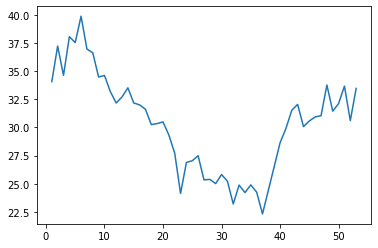

In [78]:
temp_new = grouped_week.drop([38,39], axis=0)

plt.plot(temp_new)
plt.show()

In [79]:
# Główna część zadanie to było dokonanie tego grupowania: grouped_week = dane_wezel['Roznica temperatur [C]'].groupby(dane_wezel['week']).mean() !!!

### Plik 3 - Agregacja danych i operacje na grupach

In [80]:
#kwantyle i analiza koszykowa
#wykorzystanie funkcji cut
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles1 = pd.cut(frame.data1, 4)
quartiles2 = pd.cut(frame.data2, 4)
quartiles1[:10]
# losujemy 1000 wartości i budujemy koszyczek, który pozwala nam na zbudowanie 4 kategorii

0    (-1.704, -0.127]
1     (-0.127, 1.449]
2    (-1.704, -0.127]
3     (-0.127, 1.449]
4     (-0.127, 1.449]
5     (-0.127, 1.449]
6    (-1.704, -0.127]
7      (1.449, 3.026]
8     (-0.127, 1.449]
9     (-0.127, 1.449]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.287, -1.704] < (-1.704, -0.127] < (-0.127, 1.449] < (1.449, 3.026]]

In [81]:
quartiles2[:10]
# f-cja cut dzieli nam  dane z frame.data1 na 4 kategorie

0     (-0.174, 1.433]
1     (-0.174, 1.433]
2     (-0.174, 1.433]
3    (-1.781, -0.174]
4     (-0.174, 1.433]
5    (-1.781, -0.174]
6     (-0.174, 1.433]
7    (-1.781, -0.174]
8    (-1.781, -0.174]
9     (-0.174, 1.433]
Name: data2, dtype: category
Categories (4, interval[float64]): [(-3.395, -1.781] < (-1.781, -0.174] < (-0.174, 1.433] < (1.433, 3.039]]

In [82]:
quartiles2[:10].value_counts()

(-0.174, 1.433]     6
(-1.781, -0.174]    4
(1.433, 3.039]      0
(-3.395, -1.781]    0
Name: data2, dtype: int64

In [83]:
# tak wyglądają same dane
frame.head()

data1     data2
0 -0.198069  0.172479
1 -0.103002  0.684650
2 -0.795174  0.425949
3  1.197209 -1.141474
4  0.859859  0.707737

In [84]:
frame["quar1"] = quartiles1

In [85]:
frame["quar2"] = quartiles2

In [86]:
frame

data1     data2             quar1             quar2
0   -0.198069  0.172479  (-1.704, -0.127]   (-0.174, 1.433]
1   -0.103002  0.684650   (-0.127, 1.449]   (-0.174, 1.433]
2   -0.795174  0.425949  (-1.704, -0.127]   (-0.174, 1.433]
3    1.197209 -1.141474   (-0.127, 1.449]  (-1.781, -0.174]
4    0.859859  0.707737   (-0.127, 1.449]   (-0.174, 1.433]
..        ...       ...               ...               ...
995 -0.936287  0.527892  (-1.704, -0.127]   (-0.174, 1.433]
996  0.623485 -0.219345   (-0.127, 1.449]  (-1.781, -0.174]
997 -0.812633 -0.332709  (-1.704, -0.127]  (-1.781, -0.174]
998 -0.813305 -0.306293  (-1.704, -0.127]  (-1.781, -0.174]
999  0.417339 -0.331282   (-0.127, 1.449]  (-1.781, -0.174]

[1000 rows x 4 columns]

In [87]:
#wyznaczone kategorie mogą zostać przekazane bezpośrednio do metody groupby, a funkcja get_stats może zostać użyta wraz 
#z f. apply
def get_stats(group):
    return {'count': group.count(),
            'min': group.min(),
            'mean': group.mean(),
            'max': group.max()}

In [88]:
grouped = frame.data1.groupby(quartiles1)

In [89]:
grouped

In [90]:
grouped.apply(get_stats).unstack()

count       min      mean       max
data1                                                
(-3.287, -1.704]   48.0 -3.280599 -2.159055 -1.708264
(-1.704, -0.127]  411.0 -1.697550 -0.735961 -0.128659
(-0.127, 1.449]   468.0 -0.126470  0.535719  1.448653
(1.449, 3.026]     73.0  1.451620  1.855874  3.025911

In [91]:
#przykład wyznaczający statystyki dla poszczególnych kwantyli
grouping = pd.qcut(frame.data1, 10, labels=False)
#grouped = frame.data1.groupby(grouping)
#grouped.apply(get_stats).unstack()

In [92]:
grouping

0      4
1      4
2      2
3      8
4      8
      ..
995    1
996    7
997    2
998    2
999    6
Name: data1, Length: 1000, dtype: int64

In [93]:
grouping.value_counts()

9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: data1, dtype: int64

In [94]:
grouped = frame.data1.groupby(grouping)

In [95]:
grouped.apply(get_stats).unstack()

count       min      mean       max
data1                                     
0      100.0 -3.280599 -1.797105 -1.319945
1      100.0 -1.313016 -1.045876 -0.831310
2      100.0 -0.827617 -0.692259 -0.552462
3      100.0 -0.550696 -0.405653 -0.279757
4      100.0 -0.277065 -0.152848 -0.031291
5      100.0 -0.028591  0.116865  0.246577
6      100.0  0.248030  0.364661  0.494194
7      100.0  0.494937  0.641457  0.833086
8      100.0  0.833549  1.049115  1.292581
9      100.0  1.295694  1.722451  3.025911

In [96]:
#Zadanie I
#1. Stwórz ramkę danych zawierającą wartość dowolnej zmiennej (losowanie), dla 10 stanów USA, których nazwy będą indeksem. Pięć stanów powinno pochodzić z zachodniego, a pięć ze wschodniego wybrzeża.
#2. Wprowadź cztery braki danych do zbioru - dwa dla stanów W i dwa dla stnów E.
#3. Wypełnij braki danych wartością średnią dla stanów W i E.
#4. Wypełnij braki danych wartością 0.5 dla stnów W i wartością -0.77 dla stnów E.

In [97]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Georgia',
          'Oregon', 'Nevada', 'California', 'Idaho', 'Arizona']

In [98]:
group_key = ['East'] * 5 + ['West'] * 5

In [99]:
data = pd.Series(np.random.randn(10), index=states)
data

Ohio         -1.160247
New York     -1.505455
Vermont       1.182986
Florida       2.126971
Georgia      -3.093890
Oregon       -0.693394
Nevada       -1.430279
California    0.417826
Idaho         1.530235
Arizona       0.121634
dtype: float64

In [100]:
group_key

['East',
 'East',
 'East',
 'East',
 'East',
 'West',
 'West',
 'West',
 'West',
 'West']

In [101]:
data[['Vermont', 'Ohio', 'Nevada', 'Idaho']] = np.nan
data

Ohio               NaN
New York     -1.505455
Vermont            NaN
Florida       2.126971
Georgia      -3.093890
Oregon       -0.693394
Nevada             NaN
California    0.417826
Idaho              NaN
Arizona       0.121634
dtype: float64

In [102]:
data.groupby(group_key).mean()

East   -0.824125
West   -0.051311
dtype: float64

In [103]:
# I sp.
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.824125
New York     -1.505455
Vermont      -0.824125
Florida       2.126971
Georgia      -3.093890
Oregon       -0.693394
Nevada       -0.051311
California    0.417826
Idaho        -0.051311
Arizona       0.121634
dtype: float64

In [104]:
# II sp.
fill_values = {'East': -0.77, 'West': 0.5}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.770000
New York     -1.505455
Vermont      -0.770000
Florida       2.126971
Georgia      -3.093890
Oregon       -0.693394
Nevada        0.500000
California    0.417826
Idaho         0.500000
Arizona       0.121634
dtype: float64

In [105]:
#Zadanie II
#1. Stwórz ramkę danych zawierającą listę kart do gry np. w oczko: nazwy kart i ich wartości. Kolory oznacz za pomocą liter H — kier, S — pik, C — trefl, D — karo.
#2. Stwórz funkcję losującą wybraną liczbę kart.
#3. Wylosuj dwie karty każdego koloru.

In [106]:
# H — kier, S — pik, C — trefl, D — karo
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []

In [107]:
card_val

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [108]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [109]:
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
    # do kart za pomocą extend dodajemy poszczególne wartości

In [110]:
cards

['AH',
 '2H',
 '3H',
 '4H',
 '5H',
 '6H',
 '7H',
 '8H',
 '9H',
 '10H',
 'JH',
 'KH',
 'QH',
 'AS',
 '2S',
 '3S',
 '4S',
 '5S',
 '6S',
 '7S',
 '8S',
 '9S',
 '10S',
 'JS',
 'KS',
 'QS',
 'AC',
 '2C',
 '3C',
 '4C',
 '5C',
 '6C',
 '7C',
 '8C',
 '9C',
 '10C',
 'JC',
 'KC',
 'QC',
 'AD',
 '2D',
 '3D',
 '4D',
 '5D',
 '6D',
 '7D',
 '8D',
 '9D',
 '10D',
 'JD',
 'KD',
 'QD']

In [111]:
deck = pd.Series(card_val, index=cards)

In [112]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [113]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

10S    10
5D      5
2H      2
AD      1
7S      7
dtype: int64

In [114]:
# I sp.
get_suit = lambda card: card[-1] #Ostatnia litera oznacza kolor.
deck.groupby(get_suit).apply(draw, n=2)

C  KC     10
   8C      8
D  6D      6
   3D      3
H  JH     10
   2H      2
S  10S    10
   2S      2
dtype: int64

In [115]:
# II sp.
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

5C      5
AC      1
8D      8
10D    10
6H      6
QH     10
9S      9
2S      2
dtype: int64

In [116]:
#Tabele przestawne
#domyślną metodą agregacji jest średnia
#chcemy wyzanczyć wartości średnie zmiennych liczbowych z podziałem na dzień tygodnia i informacje o paleniu
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [117]:
#chcemy wykonać agregację tylko kolumn tip_pct i size z podziałem na porę dnia i dzień tygodnia, 
# natomiast informacje o paleniu mają być umieszczone w kolumnach
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [118]:
#wykorzystanie sum częściowych - super fajne
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [119]:
#wykorzystanie innych funkcji agregujących			 
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [120]:
#uzupełnianie braków danych w tabeli przestawnej
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day',
                 aggfunc='mean',
                 fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

In [121]:
#tabele krzyżowe
#budujemy ramkę danych (głównie zmienne kategoryczne)
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

data

Sample Nationality    Handedness
0       1         USA  Right-handed
1       2       Japan   Left-handed
2       3         USA  Right-handed
3       4       Japan  Right-handed
4       5       Japan   Left-handed
5       6       Japan  Right-handed
6       7         USA  Right-handed
7       8         USA   Left-handed
8       9       Japan  Right-handed
9      10         USA  Right-handed

In [122]:
#tabele krzyżowe z wybranych zmiennych
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness   Left-handed  Right-handed  All
Nationality                                
Japan                  2             3    5
USA                    1             4    5
All                    3             7   10

In [123]:
#tabele krzyżowe z wybranych zmiennych
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

### Plik 1 - Uczenie maszynowe

In [124]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [125]:
#przykładowy zbiór danych - pomiary fizykochemiczne wlasności portugalskich win typu Vinho Verde (białe i czerwone) 
wine = pd.read_csv("winequality-all.csv", comment="#")
wine.head()
# na początku zbioru jest kilka linijek zawierających komentarze, więc określamy za pomocą 'comment', które linijki są
# komentarzem, więc w trakcie wczytywanie te linijki zostaną pominięte

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  response color  
0      9.4         3   red  
1      9.8         3   red  
2      9.8         3   red  
3      9.8         4   red  
4      9.4         3   red

In [126]:
wine.info() # spr. czy mamy braki danych
# UWAGA: to zbiór z recenzjami recenzentó win, stąd m. in. zm. response

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         5320 non-null   float64
 1   volatile.acidity      5320 non-null   float64
 2   citric.acid           5320 non-null   float64
 3   residual.sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free.sulfur.dioxide   5320 non-null   float64
 6   total.sulfur.dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  response              5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [127]:
wine.dtypes # kolor jest obiektem, więc zamianiamy ją na zm. kategoryczną

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
response                  int64
color                    object
dtype: object

In [128]:
#kolor wina jest typu object, więc musimy zmienić tą zmienną na zmienną kategoryczną
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         5320 non-null   float64 
 1   volatile.acidity      5320 non-null   float64 
 2   citric.acid           5320 non-null   float64 
 3   residual.sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free.sulfur.dioxide   5320 non-null   float64 
 6   total.sulfur.dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  response              5320 non-null   int64   
 12  color                 5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.2 KB


In [129]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [130]:
wine.columns # spr. nazwy kolumn

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [131]:
wine.shape  # spr. rozmiar

(5320, 13)

In [132]:
wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     3.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.110000     0.430000     9.500000     3.000000  
50%       3.210000     0.510000    10.400000     4.000000  
75%       3.330000     0.600000    11.400000     4.000000  
max       4.010000     2.000000    14.900000     7.000000

In [133]:
wine.describe(include="all") # dostajemy dodatkowe info o zm. kategorycznej

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count     5320.000000       5320.000000  5320.000000     5320.000000   
unique            NaN               NaN          NaN             NaN   
top               NaN               NaN          NaN             NaN   
freq              NaN               NaN          NaN             NaN   
mean         7.215179          0.344130     0.318494        5.048477   
std          1.319671          0.168248     0.147157        4.500180   
min          3.800000          0.080000     0.000000        0.600000   
25%          6.400000          0.230000     0.240000        1.800000   
50%          7.000000          0.300000     0.310000        2.700000   
75%          7.700000          0.410000     0.400000        7.500000   
max         15.900000          1.580000     1.660000       65.800000   

          chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count   5320.000000          5320.000000           5320.000000  5320.000000   
unique          NaN                  NaN                   NaN          NaN   
top             NaN                  NaN                   NaN          NaN   
freq            NaN                  NaN                   NaN          NaN   
mean       0.056690            30.036654            114.109023     0.994535   
std        0.036863            17.805045             56.774223     0.002966   
min        0.009000             1.000000              6.000000     0.987110   
25%        0.038000            16.000000             74.000000     0.992200   
50%        0.047000            28.000000            116.000000     0.994650   
75%        0.066000            41.000000            153.250000     0.996770   
max        0.611000           289.000000            440.000000     1.038980   

                 pH    sulphates      alcohol     response  color  
count   5320.000000  5320.000000  5320.000000  5320.000000   5320  
unique          NaN          NaN          NaN          NaN      2  
top             NaN          NaN          NaN          NaN  white  
freq            NaN          NaN          NaN          NaN   3961  
mean       3.224664     0.533357    10.549241     3.795677    NaN  
std        0.160379     0.149743     1.185933     0.879772    NaN  
min        2.720000     0.220000     8.000000     1.000000    NaN  
25%        3.110000     0.430000     9.500000     3.000000    NaN  
50%        3.210000     0.510000    10.400000     4.000000    NaN  
75%        3.330000     0.600000    11.400000     4.000000    NaN  
max        4.010000     2.000000    14.900000     7.000000    NaN

In [134]:
wine.iloc[:, 0:11].describe().round(1).T.iloc[:, 1:] # sprytny sposób przedstawiania danych 
# wszystko zaokrąglone do 1 miejsca po przecinku, transponujemy (T), bierzemy zm. tylko fizyko-chemiczne, które nas interesują 

mean   std  min   25%    50%    75%    max
fixed.acidity           7.2   1.3  3.8   6.4    7.0    7.7   15.9
volatile.acidity        0.3   0.2  0.1   0.2    0.3    0.4    1.6
citric.acid             0.3   0.1  0.0   0.2    0.3    0.4    1.7
residual.sugar          5.0   4.5  0.6   1.8    2.7    7.5   65.8
chlorides               0.1   0.0  0.0   0.0    0.0    0.1    0.6
free.sulfur.dioxide    30.0  17.8  1.0  16.0   28.0   41.0  289.0
total.sulfur.dioxide  114.1  56.8  6.0  74.0  116.0  153.2  440.0
density                 1.0   0.0  1.0   1.0    1.0    1.0    1.0
pH                      3.2   0.2  2.7   3.1    3.2    3.3    4.0
sulphates               0.5   0.1  0.2   0.4    0.5    0.6    2.0
alcohol                10.5   1.2  8.0   9.5   10.4   11.4   14.9

In [135]:
wine.iloc[:, 0:11].describe().round(2).T.iloc[:, 1:] # 2 miejsca po przecinku

mean    std   min    25%     50%     75%     max
fixed.acidity           7.22   1.32  3.80   6.40    7.00    7.70   15.90
volatile.acidity        0.34   0.17  0.08   0.23    0.30    0.41    1.58
citric.acid             0.32   0.15  0.00   0.24    0.31    0.40    1.66
residual.sugar          5.05   4.50  0.60   1.80    2.70    7.50   65.80
chlorides               0.06   0.04  0.01   0.04    0.05    0.07    0.61
free.sulfur.dioxide    30.04  17.81  1.00  16.00   28.00   41.00  289.00
total.sulfur.dioxide  114.11  56.77  6.00  74.00  116.00  153.25  440.00
density                 0.99   0.00  0.99   0.99    0.99    1.00    1.04
pH                      3.22   0.16  2.72   3.11    3.21    3.33    4.01
sulphates               0.53   0.15  0.22   0.43    0.51    0.60    2.00
alcohol                10.55   1.19  8.00   9.50   10.40   11.40   14.90

In [136]:
# Checemy spr., czy zawartość alkoholu jest funkcją tych wszystkich 10 parametrów, 
# więc spróbujemy zbudować model regresji liniowej, żeby spr. czy tak jest !!!
wine.color.value_counts() # spr. raz jeszcze podział wina ze względu na kolor 

white    3961
red      1359
Name: color, dtype: int64

In [137]:
# Robimy to, ponieważ czasem nie ma sensu budować ogólnego modelu dla całego zbioru, tu lepiej jest zbudować osobny model 
# dla win białych, a osobny dla win czerwonych.
wine[wine.color == 'white'].describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     3.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.090000     0.410000     9.500000     3.000000  
50%       3.180000     0.480000    10.400000     4.000000  
75%       3.290000     0.550000    11.400000     4.000000  
max       3.820000     1.080000    14.200000     7.000000

In [138]:
wine[wine.color == 'red'].describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol     response  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     3.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     1.000000  
25%       3.210000     0.550000     9.500000     3.000000  
50%       3.310000     0.620000    10.200000     4.000000  
75%       3.400000     0.730000    11.100000     4.000000  
max       4.010000     2.000000    14.900000     6.000000

In [139]:
# Jak zrobilibyśmy model wspólny, no to dostalibyśmy ładny model dla średnich wartości, ale model mógłby się NIE nauczyć
# rozpoznywać różnice między winami białymi i czerwonymi
# Dziś budujemy model dla win białych, jutro dla czerwonych !!!

In [140]:
#cel - sprawdzimy czy alkohol jest funkcją pozostałych 10 zmiennych i jaka jest ta zależność
#dzięki temu będziemy w stanie wyjaśnić pochodną jakiego zbioru czynników jest dana zawartość alkoholu
#a także przewidzieć zawartość alkoholu w nowo wyprodukowanej partii wina

In [141]:
#zajmiemy się winami białymi, ponieważ jest ich więcej i są słabsze :)
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:11] # z iloc bierzemy wartości tylko pierwszych 11 kolumn
white_wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      alcohol  
1359      8.8  
1360      9.5  
1361     10.1  
1362      9.9  
1363      9.6

In [142]:
# Weźmiemy dodatkowo jeszcze zmienną response-odpowiedź
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:12]
white_wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      alcohol  response  
1359      8.8         4  
1360      9.5         4  
1361     10.1         4  
1362      9.9         4  
1363      9.6         4

In [143]:
#tworzymy macierze zmiennych objaśniających (predyktorów) i wektor kolumnowy zmiennej objaśnianej
# Uwaga: nasza zm. celu (alcohol) znajduje się na ii miejscu od końca, więc w iloc -2 bierzemy w y, bo y = zm. celu !!!
y = white_wine.iloc[:, -2]
y.head()

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
Name: alcohol, dtype: float64

In [144]:
white_wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response'],
      dtype='object')

In [145]:
# X = zbiór z predyktorami, tu musimy wybrać wsyzstkie zm. bez 'alcohol'
X = white_wine[['fixed.acidity',
                'volatile.acidity',
                'citric.acid',
                'residual.sugar',
                'chlorides',
                'free.sulfur.dioxide',
                'total.sulfur.dioxide',
                'density',
                'pH',
                'sulphates',
                'response']]
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      response  
1359         4  
1360         4  
1361         4  
1362         4  
1363         4

In [146]:
X.shape

(3961, 11)

In [147]:
y.shape

(3961,)

In [148]:
#obliczmy wspóczynnik korelacji liniowej Pearsona
# w korelacji Pearsona zakładamy, że zmienne zachowują się jak r. normalny !!!
# Spearman nie musi być związany ze zmiennymi zależnymi liniowo
corr_P = white_wine.corr("pearson")
corr_P.shape

(12, 12)

In [149]:
# Spr., jak alcohol jest skorelowany z pozostałymi zmiennymi
corr_P

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.019214     0.298959   
volatile.acidity          -0.019214          1.000000    -0.163228   
citric.acid                0.298959         -0.163228     1.000000   
residual.sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free.sulfur.dioxide       -0.058396         -0.102471     0.091681   
total.sulfur.dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
response                  -0.124636         -0.190678     0.007065   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.083620   0.024036            -0.058396   
volatile.acidity            0.098340   0.086287            -0.102471   
citric.acid                 0.106269   0.132590             0.091681   
residual.sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free.sulfur.dioxide         0.306835   0.101272             1.000000   
total.sulfur.dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
response                   -0.117339  -0.217739             0.010507   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile.acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric.acid                       0.122845  0.160076 -0.183015   0.049442   
residual.sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free.sulfur.dioxide               0.619437  0.294638 -0.007750   0.037932   
total.sulfur.dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
response                         -0.183356 -0.337805  0.123829   0.053200   

                       alcohol  response  
fixed.acidity        -0.110788 -0.124636  
volatile.acidity      0.046815 -0.190678  
citric.acid          -0.076514  0.007065  
residual.sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free.sulfur.dioxide  -0.251768  0.010507  
total.sulfur.dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
response              0.462869  1.000000

In [150]:
# Np. b. duża korelacja jest między gęstością a residual sugar 
# (zwykle mówi się, że od 0.75 jest silna korelacja, między 0.5 a 0.75 dosyć silna)

# To jest bardzeij przejrzysty sposób, z posortowanymi wartościami
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.5
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        alcohol                -0.398167
chlorides             alcohol                -0.356928
                                                ...   
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
Length: 66, dtype: float64

In [151]:
corr_P_tri[abs(corr_P_tri)>0.5]

density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

In [152]:
# Ogólnie będziemy chcieli wyznaczyć zależności między tymi zmiennymi a alcohol, czyli wyznaczyć model regresji linowej !!!
# Jeżeli nie będzie żadnego związku między zm. niezależnymi a zm. celu, to modelowi będzie trudno złapać zależności, więc
# jakieś korelacji powinny być, ale niekoniecznie silne
# Np. tu mamy b. silną zależność m. in. alcohol a density oraz residual sugar a density, to te 2 zm. przejmą
# cały sposób wyjaśniania zjawiska, więc w sumie z tych 2 zm. moglibyśmy dostać satysfakcjonujący nas wynik.
# Ale chcemy też poznać moc produkcyjną pozostałych zmiennych.

In [153]:
# Spr. na chwilę Spearmana
corr_S = white_wine.corr("spearman")
corr_S.shape

(12, 12)

In [154]:
corr_S

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.037328     0.308689   
volatile.acidity          -0.037328          1.000000    -0.161104   
citric.acid                0.308689         -0.161104     1.000000   
residual.sugar             0.092093          0.145917     0.030789   
chlorides                  0.090136          0.017037     0.047333   
free.sulfur.dioxide       -0.035506         -0.089430     0.084318   
total.sulfur.dioxide       0.096047          0.132091     0.089576   
density                    0.263979          0.037931     0.099580   
pH                        -0.420407         -0.062852    -0.169143   
sulphates                 -0.007606         -0.007954     0.062574   
alcohol                   -0.087765          0.013266    -0.034389   
response                  -0.094236         -0.185385     0.030293   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.092093   0.090136            -0.035506   
volatile.acidity            0.145917   0.017037            -0.089430   
citric.acid                 0.030789   0.047333             0.084318   
residual.sugar              1.000000   0.191767             0.345052   
chlorides                   0.191767   1.000000             0.165546   
free.sulfur.dioxide         0.345052   0.165546             1.000000   
total.sulfur.dioxide        0.431846   0.368464             0.619998   
density                     0.743296   0.500773             0.322096   
pH                         -0.153187  -0.033579            -0.017051   
sulphates                   0.000744   0.099878             0.031688   
alcohol                    -0.378605  -0.565509            -0.270173   
response                   -0.092462  -0.333089             0.032555   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.096047  0.263979 -0.420407  -0.007606   
volatile.acidity                  0.132091  0.037931 -0.062852  -0.007954   
citric.acid                       0.089576  0.099580 -0.169143   0.062574   
residual.sugar                    0.431846  0.743296 -0.153187   0.000744   
chlorides                         0.368464  0.500773 -0.033579   0.099878   
free.sulfur.dioxide               0.619998  0.322096 -0.017051   0.031688   
total.sulfur.dioxide              1.000000  0.568226 -0.002188   0.156994   
density                           0.568226  1.000000 -0.080766   0.103765   
pH                               -0.002188 -0.080766  1.000000   0.130640   
sulphates                         0.156994  0.103765  0.130640   1.000000   
alcohol                          -0.473471 -0.808451  0.119420  -0.060261   
response                         -0.202576 -0.382900  0.136190   0.035592   

                       alcohol  response  
fixed.acidity        -0.087765 -0.094236  
volatile.acidity      0.013266 -0.185385  
citric.acid          -0.034389  0.030293  
residual.sugar       -0.378605 -0.092462  
chlorides            -0.565509 -0.333089  
free.sulfur.dioxide  -0.270173  0.032555  
total.sulfur.dioxide -0.473471 -0.202576  
density              -0.808451 -0.382900  
pH                    0.119420  0.136190  
sulphates            -0.060261  0.035592  
alcohol               1.000000  0.475713  
response              0.475713  1.000000

In [155]:
# Patrzymy znów głównie na density - residual sugar (=0.74...)
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_S_tri
# k=1, bo potrzebujemy wartości o 1 więcej niż diagonale

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
total.sulfur.dioxide  alcohol                -0.473471
fixed.acidity         pH                     -0.420407
density               response               -0.382900
                                                ...   
alcohol               response                0.475713
chlorides             density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
Length: 66, dtype: float64

In [156]:
corr_S_tri[abs(corr_S_tri)>0.5]

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
                      density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
dtype: float64

In [157]:
# Porównujemy Spearmana i Pearsona
corr_P_tri[abs(corr_P_tri)>0.5]

density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

### Plik 2 - Uczenie maszynowe

In [1]:
# Chcemy dziś skończyć chociaż 1 model, więc użyjemy do tego 'sklearn', musimy go zaimportować by mieć model liniowy
#tworzymy model regresji liniowej
import sklearn.linear_model

In [159]:
# Model ten ma zaimplementowaną regresję liniową
help(sklearn.linear_model.LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [2]:
# W ten sposób wyświetlimy parametry modelu
mnk = sklearn.linear_model.LinearRegression()

In [161]:
mnk # powinno się wyświetlić w nawiasie: copy_X=True, fit_intercept=True, n_jobs=None, normalize=False 

LinearRegression()

In [3]:
mnk.fit(X,y) # Chcemy nauczyć model, robimy to za pomocą fit
# Można sobie wejść na stronę scikit-learn.ord, wejść w 'Linear Models' i tam mamy różne metody, np. I jest MNK, i tam jest np. 
# meotda fit, i jest tam napisane co trzbea włożyć w funkcję itp.
# Uwaga: U nas mamy przestrzeń 11-wymiarową, gdyż to jest równoważne rozmiarowi X, tj. X.shape, wniosek:
# przestrzeń predyktorów jest 11-wym., przestrzeń zagadnienia jest 12-wym.

NameError: name 'X' is not defined

In [163]:
# To jest wyraz wolny:
mnk.intercept_

659.5017865896197

In [183]:
# To są wartości współczynników dla zm. niezależnych:
mnk.coef_

array([ 4.96794963e-01,  9.99248224e-01,  3.92203106e-01,  2.33484023e-01,
       -3.50380005e-01, -3.65984458e-03,  3.21492203e-04, -6.66337495e+02,
        2.32656819e+00,  9.55169783e-01,  7.61181799e-02])

In [165]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'response'],
      dtype='object')

# Dzięki tym współczynnikom możemy obliczyć wartość alkoholu
# alc = 10*'fixed.acidity' - to działa
alc = 4.96794963e-01*fixed.acidity + 9.99248224e-01*volatile.acidity + 3.92203106e-01*citric.acid + ... + 659.5017865896197
# To jest mój model !!! Dowiemy sie wogóle, czy alcohol może być uznawany za zmienną pozostałych wartości.
# W ten sposób możemy dostać przybliżoną wartość alkoholu.

In [179]:
# Tak dokładnie to możemy przewidzieć wartość średnią, hduż bierze wartości uśrednione
white_wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     3.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.090000     0.410000     9.500000     3.000000  
50%       3.180000     0.480000    10.400000     4.000000  
75%       3.290000     0.550000    11.400000     4.000000  
max       3.820000     1.080000    14.200000     7.000000

In [180]:
# Zobaczmy więc, czy działa t ow odpowiedni sposób, weźmy średnią
x_nowy = X.mean().values.reshape(1,-1)
x_nowy # dostaliśmy wartości takie, jak wartości średnie z tabeli

array([[6.83934612e+00, 2.80537743e-01, 3.34332239e-01, 5.91481949e+00,
        4.59050745e-02, 3.48891694e+01, 1.37193512e+02, 9.93789530e-01,
        3.19545822e+00, 4.90350921e-01, 3.85483464e+00]])

In [184]:
# Tak dostajemy zawartość średnią alkoholu. Jeśi tak jest (a tu tak jest), t omodel działa poprawnie.
mnk.predict(x_nowy) # Dostaliśmy model, który bardzo dobrze przewiduje wartość średnią.

array([10.58935791])

In [186]:
# Dodamy sobie dla zaburzenia modelu małą wartość do x_nowy
x_nowy = X.mean().values.reshape(1,-1)+0.0001
x_nowy # Dostaliśmy inne wartości

array([[6.83944612e+00, 2.80637743e-01, 3.34432239e-01, 5.91491949e+00,
        4.60050745e-02, 3.48892694e+01, 1.37193612e+02, 9.93889530e-01,
        3.19555822e+00, 4.90450921e-01, 3.85493464e+00]])

In [187]:
mnk.predict(x_nowy) # Tu też jest inna wartość niż była. A do każdej średniej dodaliśmy tylko 0.001

array([10.52323674])

In [188]:
# Podsumowanie tworzenia modelu:
# 1. Tworzę obiekt, do którego przypisuję model bazowy
# 2. Uczymy model za pomocą metody fit
# 3. Sprawdzamy wyniki (tu korzystamy z: intercept, coefficient)
# 4. Jeśli chcę sprawdzić jak ten model działa, to używam predict z jakąś zmienną/zbiorem (tu daliśmy 1 wektor ze średnią)

In [ ]:
# Kod do tego modelu, bez komentarzy:
mnk = sklearn.linear_model.LinearRegression()
mnk
mnk.fit(X,y)
mnk.intercept_
mnk.coef_
X.columns
white_wine.describe()
x_nowy = X.mean().values.reshape(1,-1)
x_nowy 
mnk.predict(x_nowy)